In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from scipy.io import savemat #for save obspy object as matlab format

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 4
plt.rcParams['lines.linewidth'] = 0.5

In [5]:
#2017-4-3T17:40:18
t = UTCDateTime(2017, 4, 3, 17, 40, 18)
lon = 25.1558
lat = -22.6784

client = Client("IRIS")
inventory = client.get_stations(
    starttime=t-100, endtime=t+100,
    longitude=lon, latitude=lat, maxradius=7,
    matchtimeseries=None)
print(inventory)

Inventory created at 2022-08-20T23:17:17.622000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2017-04-03...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (6):
			8A, AF, GT, NR, SY, ZT
		Stations (116):
			8A.GAMM (Namibia)
			8A.HOCH (Namibia)
			8A.KANO (Namibia)
			8A.OKAM (Namibia)
			AF.BLWY (Bulawayo, Zimbabwe)
			AF.CRLN (Carolina, Mapumpalanga, South Africa)
			AF.MOPA (Mopani Camp, Kruger National Park, RSA)
			AF.MUSN (Musina, Limpopo, South Africa)
			AF.RUDU (Rundu, Ovamboland, Namibia)
			AF.SNKL (Senekal, Freestate Province, South Africa)
			AF.SWZ (Schweizer Reneke CMG-40T Earth data Low gain)
			AF.TEZI (Itezhi-tezhi, Zambia)
			AF.UPI (Upington KS2000 Earth data Low gain)
			AF.WDLM (Western deep levels CMG-3T Earth data Low gain)
			GT.BOSA (Boshof, South Africa)
			GT.LBTB (Lobatse, Botswana)
			NR.NE201 (Sekoma)
			NR.NE202 (Lokgwabe)
			NR.NE203 (Kole)
			NR.NE204 (X

In [ ]:
NR_station_list = ["NE201", "NE208","NE209","NE211","NE212", "NE213", "NE216","NE217","NE218","NE219", "NE220"]   
#NE201 NA
#NE208 YES "clipped"
#NE209 NA
#NE211 YES
#NE212 YES
#NE213 YES
#NE216 YES
#NE217 YES "clean" "bad"
#NE218 NA
#NE219 YES "clean" "good"
#NE220 NA

In [19]:
GT_station_list = ["LBTB"]   
#LBTB yes, but instrument response not available "No data available for request"
ZT_station_list = ["MARA","MRCO","NHAM","NYAT"]
#MARA NA
#MRCO NA
#NHAM NA
#NYAT NA


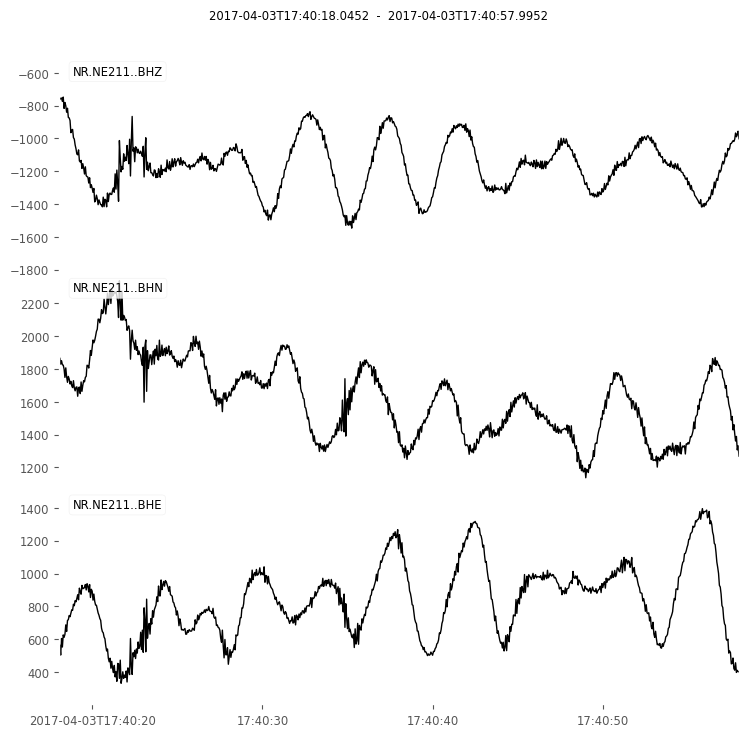

In [90]:
#Start here, change variable net and sta to download data from desired station
net = "NR"
sta = "NE211"
st = client.get_waveforms(net, sta, "*", "BH*", t, t+40)
st.plot();

In [91]:
#Download station response
inv = client.get_stations(network=net, station=sta, location="", channel="BH?", starttime=t, endtime=t+40, level="response")

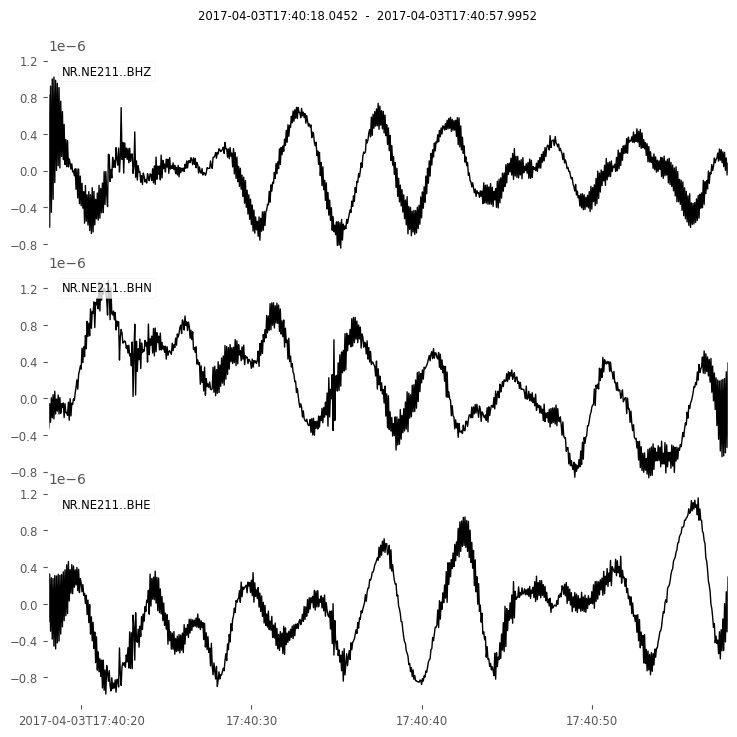

In [92]:
#Plot trace after removed instrument response
st1 = st.copy()
st1.remove_response(inventory=inv)
st1.plot();

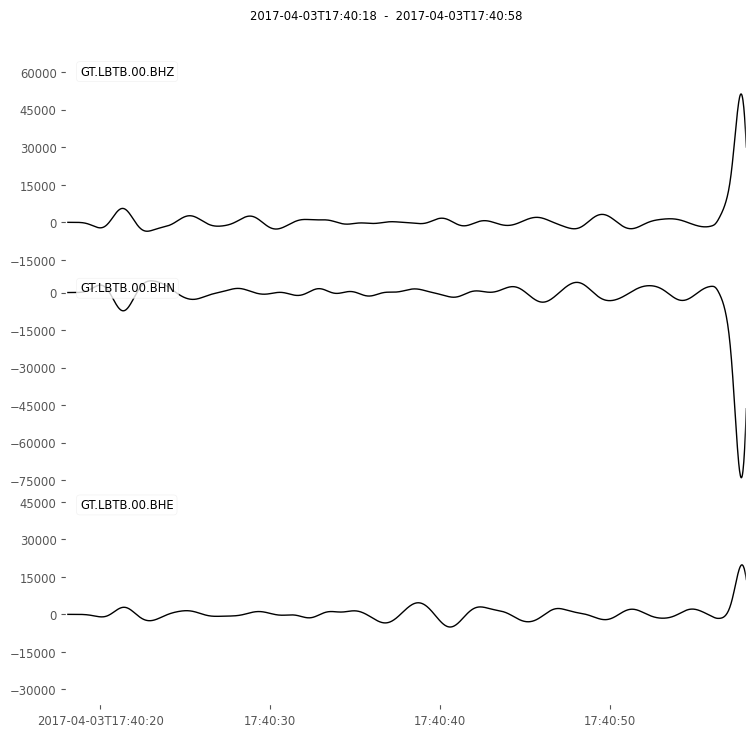

In [86]:
#plot after detrend + taper + filter
st2=st1.copy()
st2.detrend()
st2.taper(type="cosine", max_percentage=0.05).filter("bandpass", freqmin=0.2, freqmax=0.6, corners=4)
st2.plot();

In [82]:
#save data in mat format
#BHZ - 0
#BHN - 1
#BHE - 2
for i, tr in enumerate(st2):
    mdict = {k: str(v) for k, v in tr.stats.items()}
    mdict['data'] = tr.data
    savemat("data-" + str(sta) + "_" + str(i) +".mat", mdict)